# Matrix Plots

Matrix plots allow you to plot data as color-encoded matrices and can also be used to indicate clusters within the data (later in the machine learning section we will learn how to formally cluster data).

Let's begin by exploring seaborn's heatmap and clutermap:

In [2]:
import seaborn as sns
%matplotlib inline
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


## Heatmap

In order for a heatmap to work properly, your data should already be in a matrix form **(variables on columns and rows)**, the sns.heatmap function basically just colors it in for you. For example:

In [4]:
# variables on columns and rows - either through pivot tableor correlation table
# Matrix form for correlation data
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


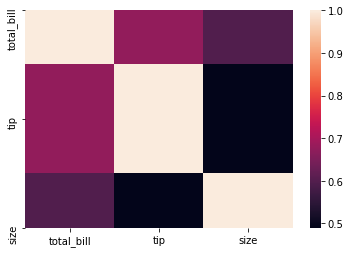

In [5]:
sns.heatmap(tips.corr())

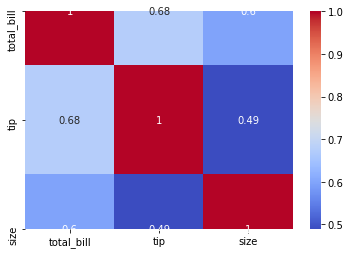

In [8]:
sns.heatmap(tips.corr(), cmap='coolwarm', annot=True)

Or for the flights data:

In [10]:
# pivot into matrix form
flights.pivot_table(index='month', columns='year', values='passengers')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


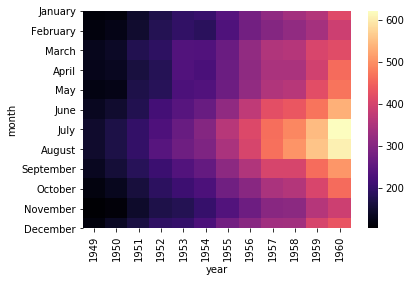

In [15]:
flight_pvt = flights.pivot_table(index='month', columns='year', values='passengers')
sns.heatmap(flight_pvt, cmap='magma')
# flights increase by year, more flights in summer months

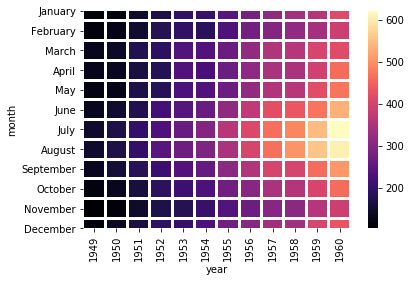

In [24]:
sns.heatmap(flight_pvt, cmap='magma', linecolor='white', linewidth=2) # easier to read

## clustermap

The clustermap uses hierarchal clustering to produce a clustered version of the heatmap. For example:

Notice now how the years and months are no longer in order, instead they are grouped by similarity in value (passenger count). That means we can begin to infer things from this plot, such as August and July being similar (makes sense, since they are both summer travel months)

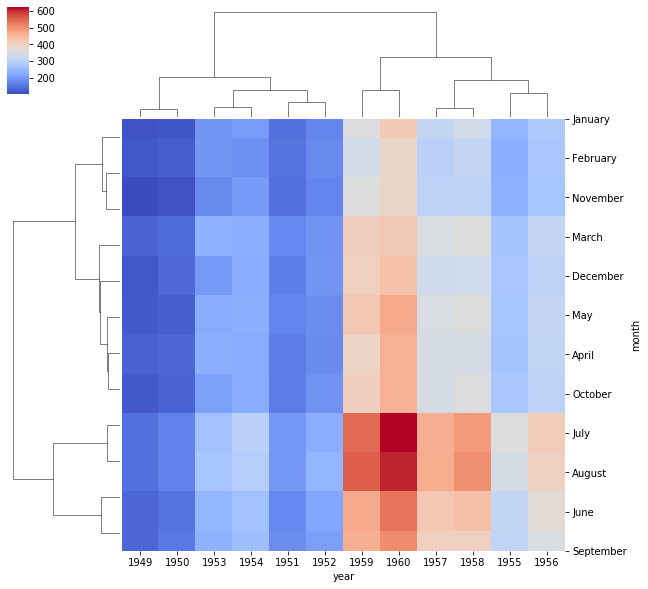

In [26]:
sns.clustermap(flight_pvt, cmap='coolwarm') # years and months are out of order as they have been cluster with similar months/ years

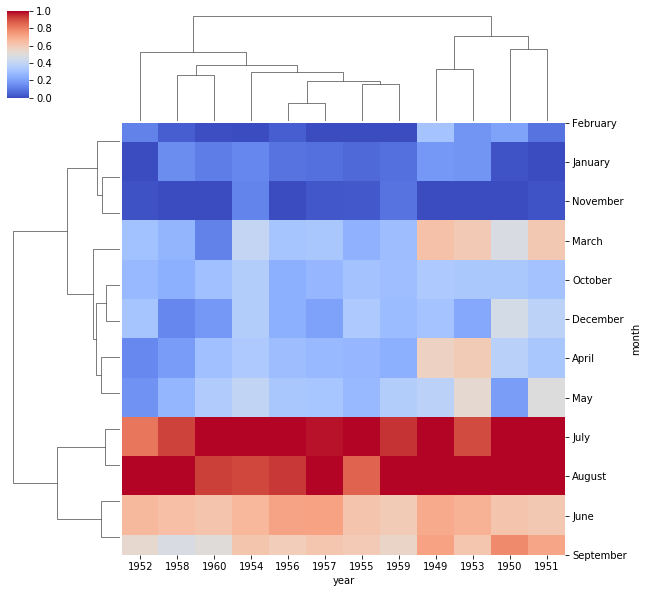

In [28]:
# More options to get the information a little clearer like normalization
# normalize scale 0 to 1 for clear picture of similarities of clusters
sns.clustermap(flight_pvt, cmap='coolwarm', standard_scale=1)